<a href="https://colab.research.google.com/github/ananyag27/Machine-Learning-Lab/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
file_path = '/content/Lab Session Data.xlsx'
purchase_data = pd.read_excel(file_path, sheet_name='Purchase data')
irctc_data = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')
thyroid_data = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

Mean Price: 1560.663453815261
Variance in Price: 58732.365352539186
Wednesday Mean: 1550.706
April Mean: 1698.9526315789474
Probability of Loss: 0.4979919678714859
Probability of Profit on Wednesday: 1.0
Conditional Probability of Profit (Wednesday): inf


<ipython-input-7-2ce13659b1e7>:15: RuntimeWarning: divide by zero encountered in scalar divide
  conditional_profit_prob = wednesday_profit_prob / np.mean(irctc_data['Day'] == 'Wednesday')


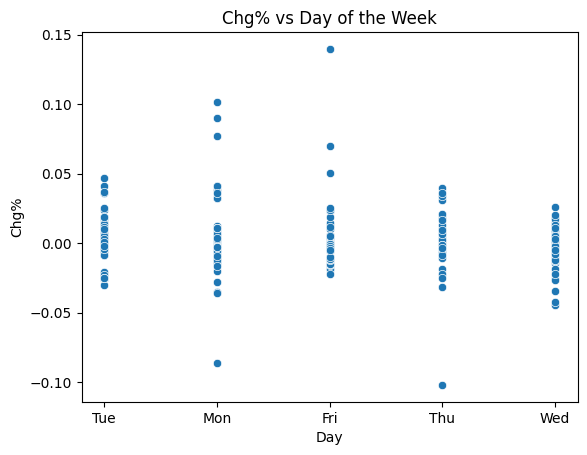

In [7]:
price_data = irctc_data['Price']
mean_price = stats.mean(price_data)
variance_price = stats.variance(price_data)
print(f"Mean Price: {mean_price}")
print(f"Variance in Price: {variance_price}")
wednesday_data = irctc_data[irctc_data['Day'] == 'Wed']['Price']
wednesday_mean = stats.mean(wednesday_data)
april_data = irctc_data[irctc_data['Month'] == 'Apr']['Price']
april_mean = stats.mean(april_data)
print(f"Wednesday Mean: {wednesday_mean}")
print(f"April Mean: {april_mean}")
chg_percent = irctc_data['Chg%']
loss_prob = np.mean(chg_percent < 0)
wednesday_profit_prob = np.mean(wednesday_data > 0)
conditional_profit_prob = wednesday_profit_prob / np.mean(irctc_data['Day'] == 'Wednesday')
print(f"Probability of Loss: {loss_prob}")
print(f"Probability of Profit on Wednesday: {wednesday_profit_prob}")
print(f"Conditional Probability of Profit (Wednesday): {conditional_profit_prob}")
sns.scatterplot(x=irctc_data['Day'], y=chg_percent)
plt.title('Chg% vs Day of the Week')
plt.show()

In [10]:
print(thyroid_data.dtypes)
missing_values = thyroid_data.isnull().sum()
print("Missing Values per Column:")
print(missing_values)
numeric_columns = thyroid_data.select_dtypes(include=[np.number])
print("Numeric Data Ranges:")
print(numeric_columns.describe())
means = numeric_columns.mean()
variances = numeric_columns.var()
print(f"Means:\n{means}")
print(f"Variances:\n{variances}")

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

In [13]:
for column in thyroid_data.columns:
  if thyroid_data[column].dtype == 'object':
    mode_value = thyroid_data[column].mode()[0]
    thyroid_data[column].fillna(mode_value, inplace=True)
  elif thyroid_data[column].dtype == 'float64':
    median_value = thyroid_data[column].median()
    thyroid_data[column].fillna(median_value, inplace=True)

In [16]:
scaler = MinMaxScaler()
thyroid_data[numeric_columns.columns] = scaler.fit_transform(thyroid_data[numeric_columns.columns])
print("Normalized Data:")
print(thyroid_data.head())

Normalized Data:
      Record ID       age sex on thyroxine query on thyroxine  \
0  0.000000e+00  0.000427   F            f                  f   
1  3.410871e-08  0.000427   F            f                  f   
2  9.891527e-07  0.000610   F            f                  f   
3  6.934301e-05  0.000534   F            f                  f   
4  6.937712e-05  0.000473   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            

In [18]:
binary_vectors = thyroid_data.iloc[:2, :].applymap(lambda x: 1 if x else 0)
f11 = np.sum((binary_vectors.iloc[0] == 1) & (binary_vectors.iloc[1] == 1))
f01 = np.sum((binary_vectors.iloc[0] == 0) & (binary_vectors.iloc[1] == 1))
f10 = np.sum((binary_vectors.iloc[0] == 1) & (binary_vectors.iloc[1] == 0))
f00 = np.sum((binary_vectors.iloc[0] == 0) & (binary_vectors.iloc[1] == 0))

JC = f11 / (f01 + f10 + f11)
SMC = (f11 + f00) / (f00 + f01 + f10 + f11)

print(f"Jaccard Coefficient: {JC}")
print(f"Simple Matching Coefficient: {SMC}")


Jaccard Coefficient: 0.967741935483871
Simple Matching Coefficient: 0.967741935483871


<ipython-input-18-396e57e02889>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_vectors = thyroid_data.iloc[:2, :].applymap(lambda x: 1 if x else 0)


In [30]:
import numpy as np
def cosine_similarity(vector1, vector2):
  dot_product = np.dot(vector1, vector2)
  norm_vector1 = np.linalg.norm(vector1)
  norm_vector2 = np.linalg.norm(vector2)
  return dot_product / (norm_vector1 * norm_vector2)
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])
cosine_sim = cosine_similarity(vector1, vector2)
print(f"Cosine Similarity: {cosine_sim}")

Cosine Similarity: 0.9746318461970762


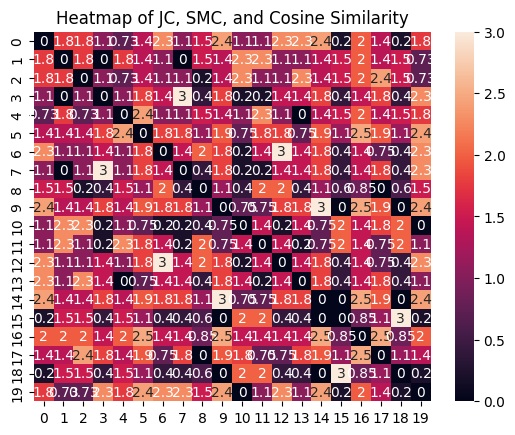

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def jaccard_coefficient(vector1, vector2):
  intersection = np.sum(np.logical_and(vector1, vector2))
  union = np.sum(np.logical_or(vector1, vector2))
  return intersection / union

def simple_matching_coefficient(vector1, vector2):
    matches = np.sum(vector1 == vector2)
    total = len(vector1)
    return matches / total

data = np.random.randint(0, 2, size=(20, 5))
jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cosine_matrix = np.zeros((20, 20))

for i in range(20):
  for j in range(20):
    if i != j:
      jc_matrix[i, j] = jaccard_coefficient(data[i], data[j])
      smc_matrix[i, j] = simple_matching_coefficient(data[i], data[j])
      cosine_matrix[i, j] = cosine_similarity(data[i], data[j])

combined_matrix = jc_matrix + smc_matrix + cosine_matrix

sns.heatmap(combined_matrix, annot=True)
plt.title("Heatmap of JC, SMC, and Cosine Similarity")
plt.show()
